# Analyzing the Obesity dataset to gain insight and build predictive model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
warnings.filterwarnings('ignore')

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv
/kaggle/input/obesity/ObesityDataSet_raw_and_data_sinthetic.csv
/kaggle/input/obesity-trend/share-of-adults-defined-as-obese.csv




## Reason for This Analysis:

The plot below, created using data from the World Health Organization's Global Health Observatory (2024) and processed by Our World in Data, illustrates a concerning trend: the obesity rate is increasing in nearly every country worldwide. This raises the question: **What are the underlying causes of this trend?**

Obesity has emerged as a critical global health issue, with rising prevalence rates associated with a range of chronic diseases, including diabetes, heart disease, and certain cancers. This analysis aims to explore the daily habits and lifestyle choices that contribute to obesity, seeking to uncover insights that can inform public health strategies and individual behavior modifiur voice or style!

In [2]:
import plotly.express as px
import plotly.io as pio

# Set renderer
pio.renderers.default = 'svg'

df = pd.read_csv("/kaggle/input/obesity-trend/share-of-adults-defined-as-obese.csv")
df.rename(columns={'Prevalence of obesity among adults, BMI >= 30 (crude estimate) (%) - Sex: both sexes - Age group: 18+  years': 'Obesity'}, inplace=True)

# Create Plotly line chart
fig = px.line(df, 
              x='Year', 
              y='Obesity', 
              color='Entity', 
              labels={'Obesity': 'Prevalence of Obesity (%)'},
              title='Obesity in Adults, 1975 to 2016')

# Customize the layout for a modern dark theme
fig.update_layout(
    title={
        'text': "Obesity in Adults (1975 - 2016)",
        'y': 0.9,  # Title placement (closer to the top)
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=20, color='white')
    },
    xaxis_title="Year",
    yaxis_title="Prevalence of Obesity (%)",
    legend_title="Country",
    legend=dict(
        x=0.95,
        y=0.05,
        entrywidth=100,
        entrywidthmode='pixels',
        font=dict(color='white', size=10),
        bgcolor='rgba(0, 0, 0, 0.7)',
        traceorder='reversed+grouped',
        bordercolor='gray',
        borderwidth=1,
        itemclick="toggleothers",
        itemsizing='constant',
        orientation='v',
    ),
    font=dict(
        family="Arial",
        size=14,
        color="white"
    ),
    plot_bgcolor='rgba(0, 0, 0, 0.8)',  # Darker transparent background for plot area
    paper_bgcolor='rgba(0, 0, 0, 0.9)',  # Darker background for the paper area
    xaxis=dict(
        showgrid=True,  # Add grid lines to the x-axis
        gridcolor='rgba(255, 255, 255, 0.2)',  # Light gray grid lines for contrast
        tickmode='linear',
        tick0=1975,
        dtick=5,  # Interval of ticks on x-axis
        ticks='outside',  # Ticks outside the axis line for modern look
        tickcolor='white'  # Tick color
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='rgba(255, 255, 255, 0.2)',  # Light gray grid lines for contrast
        tickmode='linear',
        tick0=0,
        dtick=5,
        ticks='outside',
        tickcolor='white'
)
)

# Add markers to the lines
fig.update_traces(mode="lines+markers", marker=dict(size=6))

# Set specific countries and reion to be visible initially, others hidden
regions = [
    'Nigeria',
    'United States',
    "Africa (WHO)",
    "Americas (WHO)",
    "Europe (WHO)"
]

for trace in fig.data:
    if trace.name not in regions:
        trace.visible = 'legendonly'

# Show the chart
fig.show(renderer='iframe')

In [3]:
# Customizing visualization aesthetics
rc = {
    "axes.facecolor": "#f7f9fc",
    "figure.facecolor": "#f7f9fc",
    "axes.edgecolor": "#333333",
    "grid.color": "#d4d4d4",
    "font.family": "serif",
    "axes.labelcolor": "#333333",
    "xtick.color": "#333333",
    "ytick.color": "#333333",
    "grid.alpha": 0.5
}

d_palette = 'YlOrRd'  # Warm color palette for better contrast

# Applying the visual settings
sns.set(rc=rc)
c_palette = sns.color_palette(["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854", "#ffd92f", "#e5c494", "#b3b3b3"])
sns.set_palette(c_palette)
pd.set_option('display.max_columns', 35)
pd.options.display.float_format = '{:,.2f}'.format


In [4]:
train_df = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")
obes_df = pd.read_csv("/kaggle/input/obesity/ObesityDataSet_raw_and_data_sinthetic.csv")

- The `train.csv` and `test.csv` datasets were generated from a deep learning model trained on the original `ObesityDataSet.csv`. While their feature distributions are similar, they might exhibit slight variations. To ensure a comprehensive analysis, we'll primarily use the `ObesityDataSet.csv i.e obes_df` for our exploratory data analysis (EDA). However, the `train_df` would be used when building the model as it closely mirror the original dataset's characteristics.

## Dataset (obes_df) Overview

The dataset ill be analyzing estimates obesity levels in individuals aged 14 to 61 from Mexico, Peru, and Colombia. Data was collected through a web-based survey, where anonymous users answered questions about their eating habits and physical condition. The dataset contains **17 attributes** and **2,111 records**.
A

### Key Attributes:

- **Eating Habits**:
  - Frequent consumption of high-calorie food (FAVC)
  - Frequency of vegetable consumption (FCVC)
  - Number of main meals (NCP)
  - Consumption of food between meals (CAEC)
  - Daily water intake (CH20)
  - Alcohol consumption (CALC)

- **Physical Condition**:
  - Monitoring of calorie consumption (SCC)
  - Physical activity frequency (FAF)
  - Time using technology devices (TUE)
  - Transportation meth
- source:  https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihubod (MTRANS)

<iframe src="https://ourworldindata.org/grapher/share-of-adults-defined-as-obese?tab=chart" loading="lazy" style="width: 100; height: 600px; border: 0px none;" allow="web-share; clipboard-write"></iframe>

In [5]:
obes_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.00,1.62,64.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,0.00,1.00,no,Public_Transportation,Normal_Weight
1,Female,21.00,1.52,56.00,yes,no,3.00,3.00,Sometimes,yes,3.00,yes,3.00,0.00,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.00,1.80,77.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,2.00,1.00,Frequently,Public_Transportation,Normal_Weight
3,Male,27.00,1.80,87.00,no,no,3.00,3.00,Sometimes,no,2.00,no,2.00,0.00,Frequently,Walking,Overweight_Level_I
4,Male,22.00,1.78,89.80,no,no,2.00,1.00,Sometimes,no,2.00,no,0.00,0.00,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
cat_col = obes_df.select_dtypes("object").columns.to_list()
for col in cat_col[:-1]:
    obes_df[col] = obes_df[col].astype("category")
    train_df[col] = train_df[col].astype("category")
    test_df[col] = test_df[col].astype("category")

In [7]:
obes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          2111 non-null   category
 1   Age                             2111 non-null   float64 
 2   Height                          2111 non-null   float64 
 3   Weight                          2111 non-null   float64 
 4   family_history_with_overweight  2111 non-null   category
 5   FAVC                            2111 non-null   category
 6   FCVC                            2111 non-null   float64 
 7   NCP                             2111 non-null   float64 
 8   CAEC                            2111 non-null   category
 9   SMOKE                           2111 non-null   category
 10  CH2O                            2111 non-null   float64 
 11  SCC                             2111 non-null   category
 12  FAF                 

- Based on the info above there is no null value all features has the right datatype

## Exploratory Data Analysis

#### NObesity values are:
- Underweight  - Less than 18.5
- Normal - 18.5 to 24.9
- Overweight - 25.0 to 29.9
- Obesity I - 30.0 to 34.9
- Obesity II - 35.0 to 39.9
- Obesity III - Higher than 40

Ill like to inspect the dataset obecity level category to see if each category BMI truly match the standard

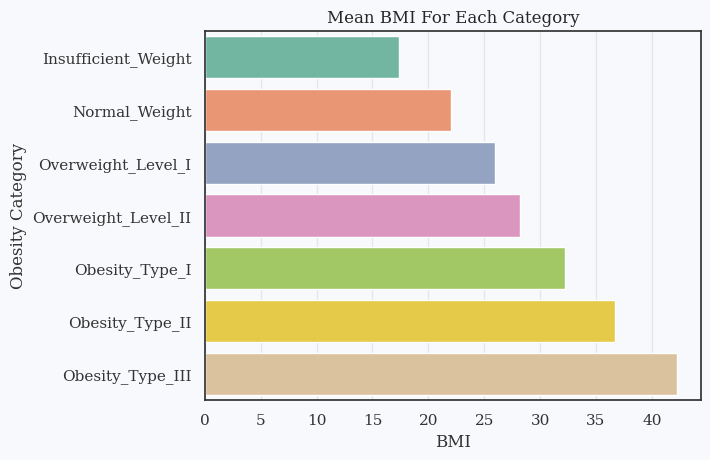

In [8]:
for df in [train_df, test_df, obes_df]:
    df["BMI"] = df["Weight"] / (df["Height"] ** 2)
bmi_df = obes_df.groupby("NObeyesdad")["BMI"].mean().sort_values().reset_index()
sns.barplot(bmi_df, x="BMI", y="NObeyesdad")
plt.ylabel("Obesity Category")
plt.title("Mean BMI For Each Category")
plt.show()

In [9]:
category_order = [
    "Insufficient_Weight",
    "Normal_Weight",
    "Overweight_Level_I",
    "Overweight_Level_II",
    "Obesity_Type_I",
    "Obesity_Type_II",
    "Obesity_Type_III"
]
obes_df['NObeyesdad'] = pd.Categorical(obes_df['NObeyesdad'], categories=category_order, ordered=True)
train_df['NObeyesdad'] = pd.Categorical(train_df['NObeyesdad'], categories=category_order, ordered=True)

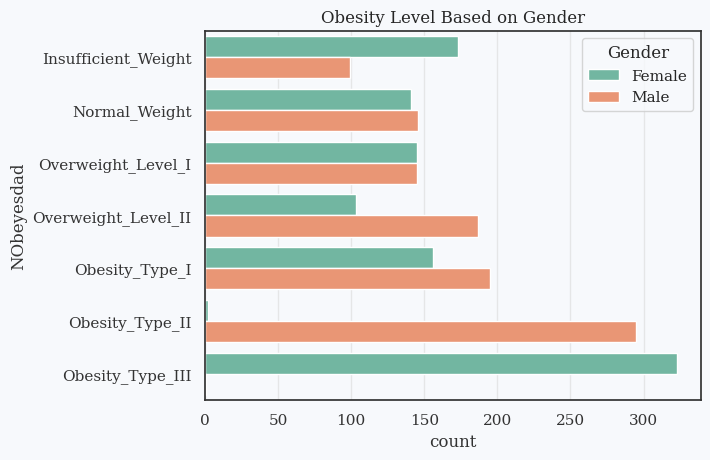

In [10]:
sns.countplot(data=obes_df, y="NObeyesdad", hue="Gender")
plt.title("Obesity Level Based on Gender")
plt.show()

- from the above plot we could see that
  - Males dominate in Obesity Type II and Overweight Level II.
  - Females show a clear prevalence in Obesity Type III and Insufficient Weight.
  - Overweight Level I and Obesity Type I are fairly balanced, with a slight female lead.
- This highlights gender disparities, especially at the extremes of obesity and underweight categories.

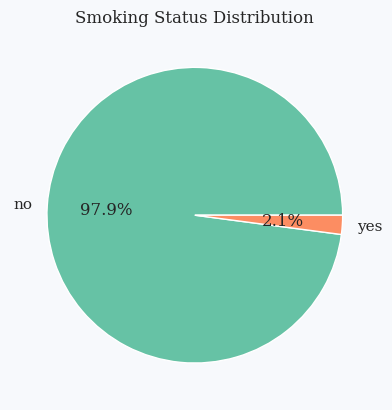

In [11]:
smoker_counts = obes_df.groupby("SMOKE")["SMOKE"].count()
plt.title("Smoking Status Distribution")
plt.pie(smoker_counts, labels=smoker_counts.index, autopct="%1.1f%%")
plt.show()

According to [Our World in Data](https://ourworldindata.org/grapher/share-of-adults-who-smoke?region=SouthAmerica&country=USA~BRA~RUS~IND~CHN~European+Union~IDN~OWID_WRL), 13% of adults in Mexico, 8.1% in Peru, and 8.5% in Colombia smoke. However, our dataset shows only 2.1% smokers, indicating it is not representative of the population. As a result, we cannot draw reliable conclusions about the relationship between smoking and obesity from this dataset.

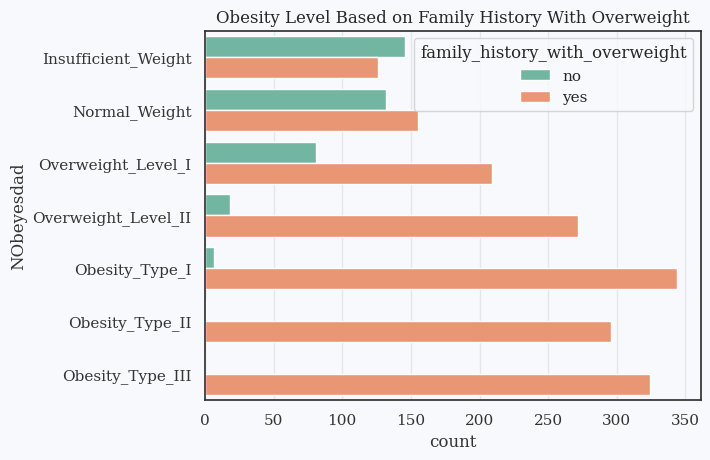

In [12]:
sns.countplot(data=obes_df, y="NObeyesdad", hue="family_history_with_overweight")
plt.title("Obesity Level Based on Family History With Overweight")
plt.show()

- The above chart highlights a strong link between family history of overweight and higher obesity levels:
    - Obesity Types I, II, and III are overwhelmingly prevalent in individuals with a family history of being overweight.
    - Overweight Level II also shows a clear dominance among those with a family history.
    - People without a family history are more represented in the Normal Weight and Insufficient Weight categories.
- *The data strongly suggests a genetic or familial predisposition to higher obesity levels, emphasizing the role of family history in weight-related health risks*

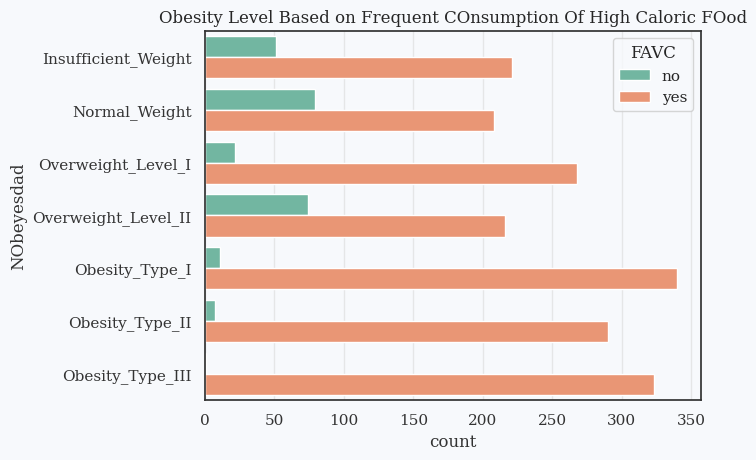

In [13]:
sns.countplot(data=obes_df, y="NObeyesdad", hue="FAVC")
plt.title("Obesity Level Based on Frequent COnsumption Of High Caloric FOod")
plt.show()

The above chart shows a clear relationship between frequent consumption of high-caloric food (FAVC) and obesity levels:

- **Obesity Types I, II, and III** are overwhelmingly prevalent among individuals who frequently consume high-caloric foods.
- **Overweight Levels I and II** also show a majority of people with frequent high-caloric food intake.
- Those who do **not** frequently consume high-caloric food are more likely to fall into the **Normal Weight** and **Insufficient Weight** categories.

*This strongly suggests that frequent consumption of high-caloric foods plays a significant role in higher obesity levels, emphasizing the impact of diet on weight management.*

*I noticed the **FCVC** column which represent the question : `Do you usually eat vegetables in your meals?` with expected answer been
    - Never : 1
    - Sometimes: 2
    - Always: 3 according to the original research paper https://doi.org/10.1016/j.dib.2019.104344*

<Axes: >

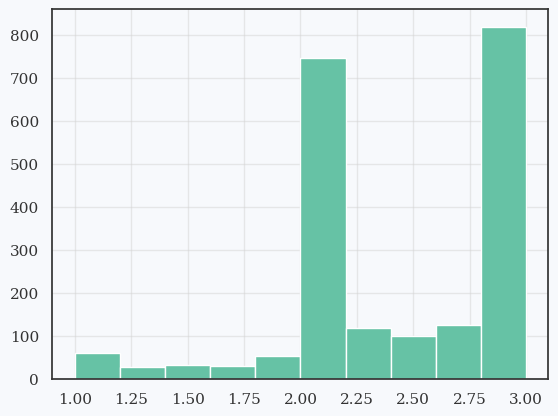

In [14]:
obes_df.FCVC.hist()

- as seen it is not of three value hence we adress it by rounding to integer

In [15]:
fcvc_mapping = {2.00: "sometime", 1.00: "never", 3.00: "always"}
ncp_mapping = {1.00: "<3", 2.00: "<3", 3.00: "=3", 4.00: ">3"}
faf_mapping = {0.00: "I don't", 1.00: "1-2 Days", 2.00: "2-4 Days", 3.00: "4-5 Days"}
tue_mapping = {0.00: "0-2 hours", 1.00: "3-5 hours", 2.00: ">5 hours"}
ch2o_mapping = {1.00: "<1 liter", 2.00: "1-2 liters", 3.00: ">2 liters"}

columns = ['FCVC', 'NCP', 'FAF', 'TUE', 'CH2O']

for df in [obes_df, train_df, test_df]:
    for col in columns:
        df[col] = df[col].round(0).astype('category')

    df['FCVC'] = df['FCVC'].replace(fcvc_mapping)
    df['NCP'] = df['NCP'].replace(ncp_mapping)
    df['FAF'] = df['FAF'].replace(faf_mapping)
    df['TUE'] = df['TUE'].replace(tue_mapping)
    df['CH2O'] = df['CH2O'].replace(ch2o_mapping)

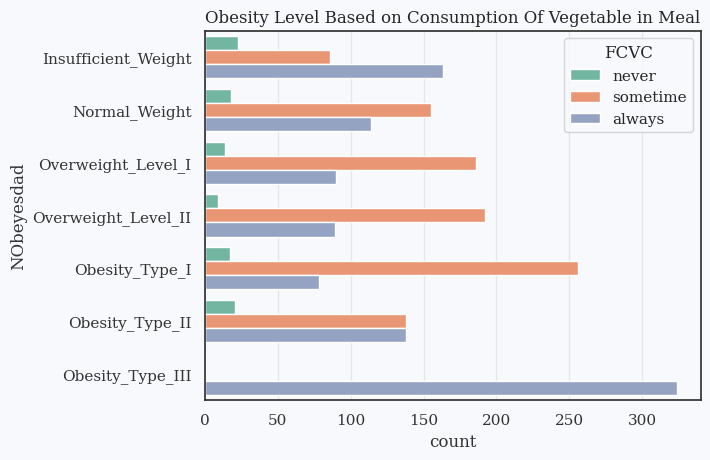

In [16]:
sns.countplot(data=obes_df, y="NObeyesdad", hue="FCVC")
plt.title("Obesity Level Based on Consumption Of Vegetable in Meal")
plt.show()

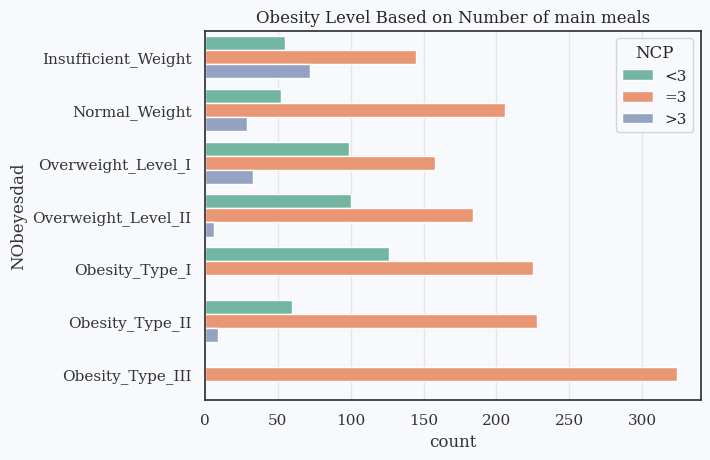

In [17]:
sns.countplot(data=obes_df, y="NObeyesdad", hue="NCP")
plt.title("Obesity Level Based on Number of main meals")
plt.show()

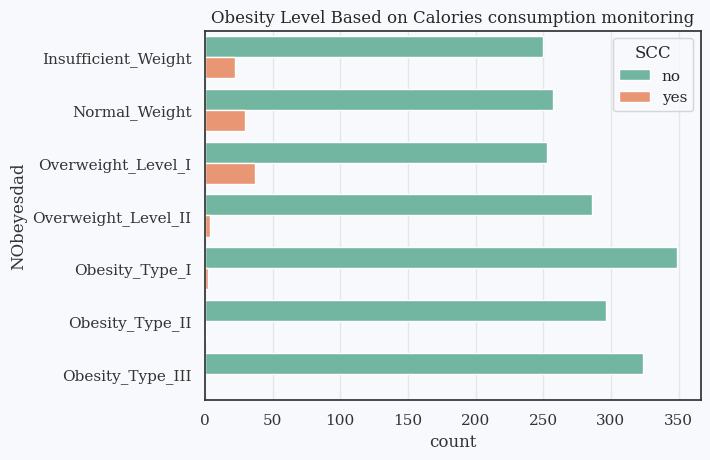

In [18]:
sns.countplot(data=obes_df, y="NObeyesdad", hue="SCC")
plt.title("Obesity Level Based on Calories consumption monitoring")
plt.show()

*The plot reveals a notable trend among individuals with insufficient and normal weight, who exhibit a higher propensity to monitor their calorie intake compared to other weight categories. However, the overall percentage of participants actively tracking their calorie consumption remains relatively low.
While some individuals in the 'overweight level 1' category may be motivated to monitor their calories due to weight concerns, those in the 'overweight level 2' category appear less inclined to do so, potentially indicating a loss of motivation or a change in approach to weight management.*

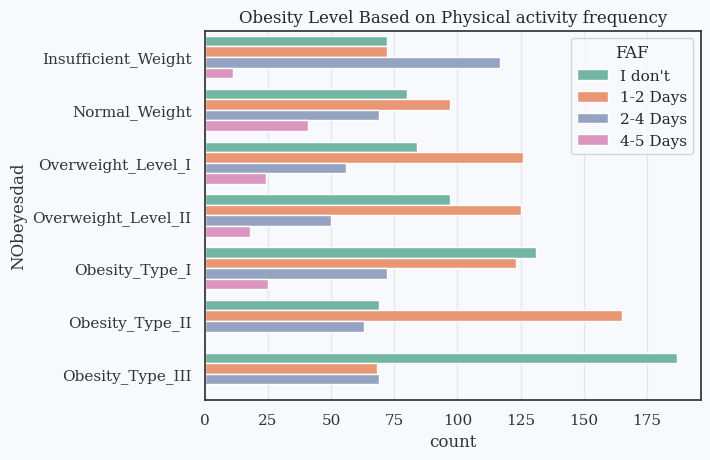

In [19]:
sns.countplot(data=obes_df, y="NObeyesdad", hue="FAF")
plt.title("Obesity Level Based on Physical activity frequency")
plt.show()

This chart provides insights into the relationship between physical activity frequency (FAF) and different obesity levels. Here are some key observations:

1. **Obesity Type III** is significantly more prevalent among those who do not engage in physical activity ("I don't"), with a very high count compared to other activity levels.
2. In contrast, **Normal Weight** individuals are most represented among those exercising 2-4 days per week, highlighting the potential impact of moderate physical activity.
3. **Obesity Type II** also shows a strong association with inactivity, with higher counts for those reporting no physical activity.
4. **Overweight Levels I and II** have relatively balanced distributions across activity levels, with a slight preference toward 2-4 days of exercise.
5. The lowest counts for **Insufficient Weight** are among those engaging in physical activity for 4-5 days, indicating that underweight individuals are less represented in higher activity groups.

The data suggests that increased physical activity (2-4 days per week) is associated with lower obesity levels, while inactivity correlates with higher obesity rates.

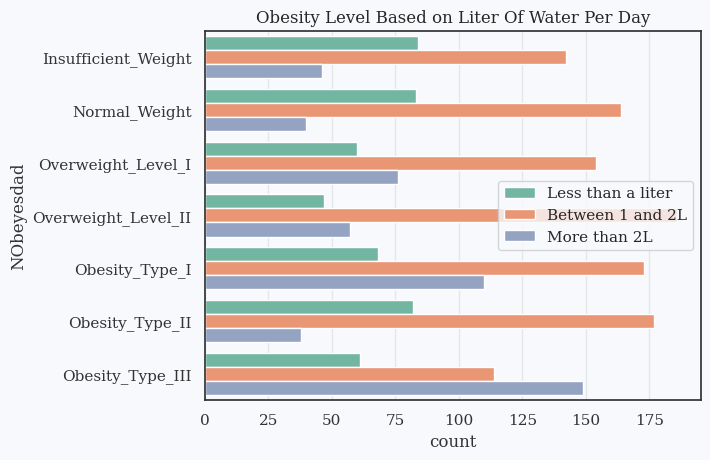

In [20]:
ax = sns.countplot(data=obes_df, y="NObeyesdad", hue="CH2O")
new_label = ["Less than a liter", "Between 1 and 2L", "More than 2L"]
plt.title("Obesity Level Based on Liter Of Water Per Day")
ax.legend(labels = new_label)
plt.show()

The above chart explores the connection between daily water intake and obesity levels.

1. **Normal Weight** folks seem to love their hydration sweet spot! Most of them consume between 1 and 2 liters of water per day, making this the perfect "goldilocks" zone for staying fit.
2. **Obesity Type I, II, and III** seem to prefer a bit of everything, but those drinking less than 1 liter per day are dominating the ranks. Could it be that skipping water is their kryptonite?
3. Interestingly, **Overweight Level I** and **Level II** show a steady balance across all water intake levels, but there’s a visible boost for those drinking between 1 and 2 liters.
4. Those in the **Insufficient Weight** category favor drinking between 1 and 2 liters, suggesting that moderate water intake doesn’t just help with weight management — it's for everyone!
5. The folks who go all out and drink **more than 2 liters a day** are somewhat rare across all obesity levels, except for **Obesity Type III**, where they form a prominent group. Maybe they're trying to quench their thirst for health!

It seems that staying hydrated — especially in the 1 to 2-liter range — might be an easy, fun way to maintain a balanced weight. So, bottoms up!

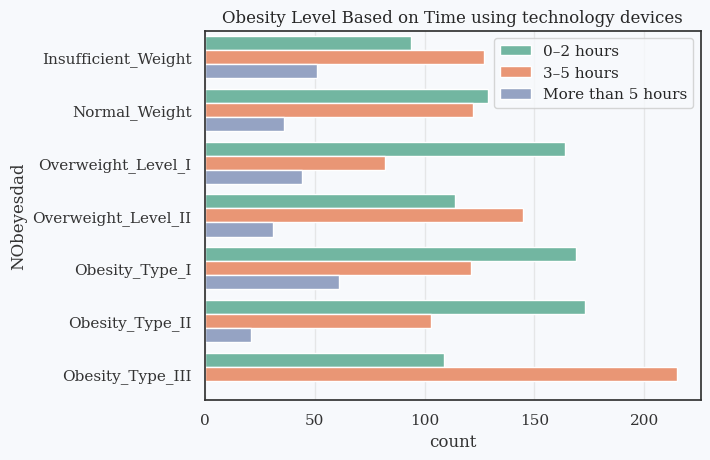

In [21]:
ax = sns.countplot(data=obes_df, y="NObeyesdad", hue="TUE")
new_label = ["0–2 hours", "3–5 hours", "More than 5 hours"]
plt.title("Obesity Level Based on Time using technology devices")
ax.legend(labels = new_label)
plt.show()

This chart reveals that higher obesity levels, particularly **Obesity Type III**, are strongly associated with spending **3-5 hours** using technology devices. In contrast, those with **Normal Weight** or **Insufficient Weight** spend mostly **0-2 hours** on devices. The more time spent on screens, the greater the prevalence of obesity, indicating a link between sedentary behavior and higher obesity risk.

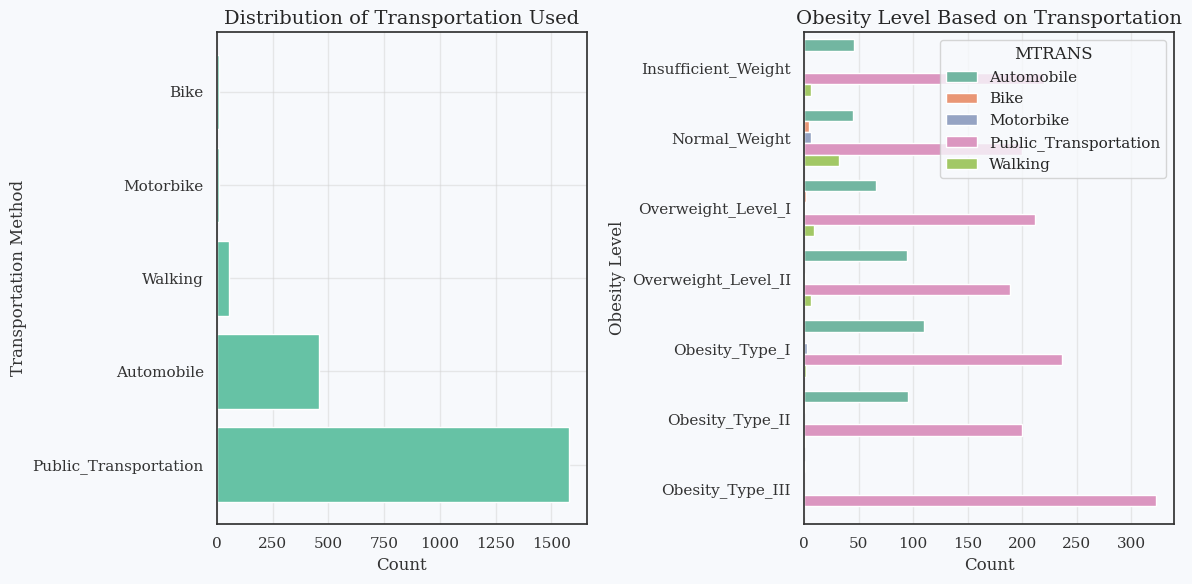

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figure size for better readability

# Plot 1: Distribution of Transportation Used
transportation_counts = obes_df['MTRANS'].value_counts()
ax[0].barh(transportation_counts.index, transportation_counts)
ax[0].set_title("Distribution of Transportation Used", fontsize=14)
ax[0].set_xlabel("Count")
ax[0].set_ylabel("Transportation Method")

# Plot 2: Obesity Level Based on Main Meals
sns.countplot(data=obes_df, y="NObeyesdad", hue="MTRANS", ax=ax[1])
ax[1].set_title("Obesity Level Based on Transportation", fontsize=14)
ax[1].set_xlabel("Count")
ax[1].set_ylabel("Obesity Level")

plt.tight_layout()  # Ensures the plots don't overlap
plt.show()


Due to the heavy skew towards public transportation in the dataset, it's challenging to draw clear insights or make definitive conclusions about the relationship between transportation mode and obesity levels. The imbalance limits the ability to fully explore patterns across other modes of transport. For better insights, a more balanced dataset would be needed.

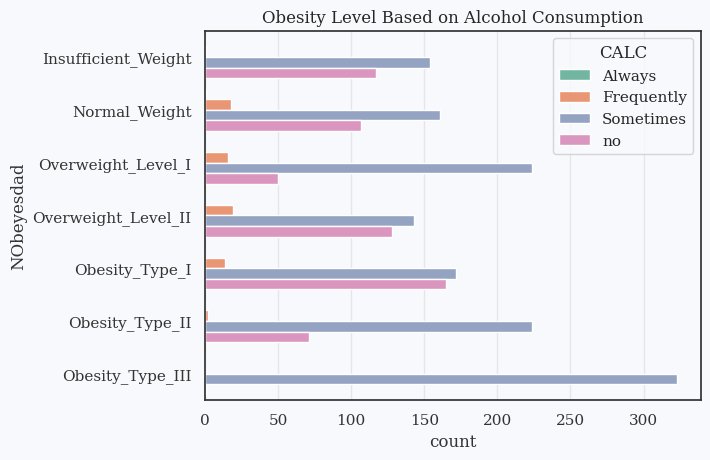

In [23]:
ax = sns.countplot(data=obes_df, y="NObeyesdad", hue="CALC")
plt.title("Obesity Level Based on Alcohol Consumption")
plt.show()

The chart illustrates the relationship between obesity levels and alcohol consumption habits. Key insights include:

- i noticed that `insufficient weight, normal weight, and obesity type I` have higher count of no alcholo Intake compared to the other categories

This suggests that more frequent alcohol consumption may be associated with higher obesity levels, particularly in severe obesity categories.

In [24]:
obes_df.NObeyesdad.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2111 entries, 0 to 2110
Series name: NObeyesdad
Non-Null Count  Dtype   
--------------  -----   
2111 non-null   category
dtypes: category(1)
memory usage: 2.5 KB


## Modelling for Classfication

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import joblib

In [26]:
test_id = test_df.id.copy()
train_df.drop(columns="id", inplace=True)
test_df.drop(columns="id", inplace=True)

In [27]:
train_df = pd.concat((obes_df, train_df), ignore_index=True).drop_duplicates()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22388 entries, 0 to 22868
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          22388 non-null  category
 1   Age                             22388 non-null  float64 
 2   Height                          22388 non-null  float64 
 3   Weight                          22388 non-null  float64 
 4   family_history_with_overweight  22388 non-null  category
 5   FAVC                            22388 non-null  category
 6   FCVC                            22388 non-null  category
 7   NCP                             22388 non-null  category
 8   CAEC                            22388 non-null  category
 9   SMOKE                           22388 non-null  category
 10  CH2O                            22388 non-null  category
 11  SCC                             22388 non-null  category
 12  FAF                    

In [28]:
train_df.CALC = train_df.CALC.astype("category")
X = train_df.drop(columns="NObeyesdad")
y = train_df.NObeyesdad.copy()

In [29]:
cat_col = X.select_dtypes("category").columns.to_list()
num_cols = X.select_dtypes("number").columns.to_list()

In [30]:
scaler = StandardScaler()
one_hot = OneHotEncoder(sparse=True)

# Scale numerical features
X[num_cols] = scaler.fit_transform(X[num_cols])
test_df[num_cols] = scaler.transform(test_df[num_cols])

# One-hot encode categorical features (sparse matrix)
cat_encoded = one_hot.fit_transform(X[cat_col])
test_cat_encoded = one_hot.transform(test_df[cat_col])

# Convert sparse matrices to DataFrames
encoded_df = pd.DataFrame.sparse.from_spmatrix(cat_encoded, index=X.index)
test_encoded_df = pd.DataFrame.sparse.from_spmatrix(test_cat_encoded,index=test_df.index)

# Concatenate the original numerical features with the encoded categorical features
X = pd.concat((X[num_cols], encoded_df), axis=1)
test_df = pd.concat((test_df[num_cols], test_encoded_df), axis=1)

# Optionally, convert to sparse DataFrame to save memory
X = X.astype(pd.SparseDtype("float", 0))  # Adjust dtype as necessary
test_df = test_df.astype(pd.SparseDtype("float", 0))


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [31]:
# import optuna

# # Define the objective function
# def objective(trial):
#     params = {
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'gamma': trial.suggest_float('gamma', 0, 5),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#         'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#         'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#     }

#     # Create the model
#     xgb_model = XGBClassifier(
#         device="gpu",
#         random_state=42,
#         **params
#     )
#     # Return the accuracy
#     accuracy = cross_val_score(xgb_model, X, y, cv=3, scoring='accuracy', n_jobs=-1)
#     return accuracy.mean()
    
# # Create the study object
# study = optuna.create_study(direction='maximize')

# # Optimize the objective function
# study.optimize(objective, n_trials=300)  # You can adjust n_trials as needed

# # Print the best parameters and their corresponding accuracy
# print("Best parameters:", study.best_params)
# print("Best accuracy:", study.best_value)

In [32]:
params = {'colsample_bytree': 0.5387712132377585, 'gamma': 0.1761332747962042, 
            'learning_rate': 0.12636939329964353, 'max_depth': 6, 'min_child_weight': 3,
            'n_estimators': 255, 'reg_alpha': 0.9830859592671057,
            'reg_lambda': 9.518228893654276, 'subsample': 0.7139180957245418}

xgb_model = XGBClassifier(
    device='cuda',
    random_state=42,
    **params
)

scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')

print(f'Mean cross-validation accuracy: {scores.mean()}')

# Fit the model with the encoded labels
xgb_model.fit(X, y)
test_pred = xgb_model.predict(test_df)

Mean cross-validation accuracy: 0.9084773019321721


In [33]:
test_pred = label_encoder.inverse_transform(test_pred)
submission = pd.DataFrame({'id': test_id, 'NObeyesdad': test_pred})
submission.to_csv('submission.csv', index=False)
submission['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       2626
Normal_Weight          2127
Obesity_Type_II        2112
Obesity_Type_I         2056
Overweight_Level_II    1748
Insufficient_Weight    1716
Overweight_Level_I     1455
Name: count, dtype: int64

In [34]:
# # Save the encoders and model
# joblib.dump(one_hot, 'one_hot_encoder.pkl')
# joblib.dump(scaler, 'scaler.pkl')
# joblib.dump(label_encoder, 'label_encoder.pkl')
# xgb_model.save_model('xgb_model.json')